In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [3]:
df=pd.read_csv("USD_data.csv",sep=";")
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [5]:
df.shape

(12, 3)

In [6]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [7]:
df.describe()

,Starting (USD),Ending (USD)
count,12.000000,12.000000
mean,16195.833333,15975.000000
std,338.753285,369.582074
min,15800.000000,15300.000000
25%,15900.000000,15700.000000
50%,16175.000000,16100.000000
75%,16300.000000,16200.000000
max,16800.000000,16500.000000


In [11]:
new_df=df.drop(columns=['Date'])
new_df.head(3)

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300


In [9]:
a=df['Starting (USD)'];
a.head()

0    16800
1    15900
2    15800
3    16100
4    16300
Name: Starting (USD), dtype: int64

In [10]:
b=df['Ending (USD)']
b.head()

0    16500
1    16100
2    15300
3    16200
4    15700
Name: Ending (USD), dtype: int64

Text(0.5, 1.0, 'Details Of Stock Market')

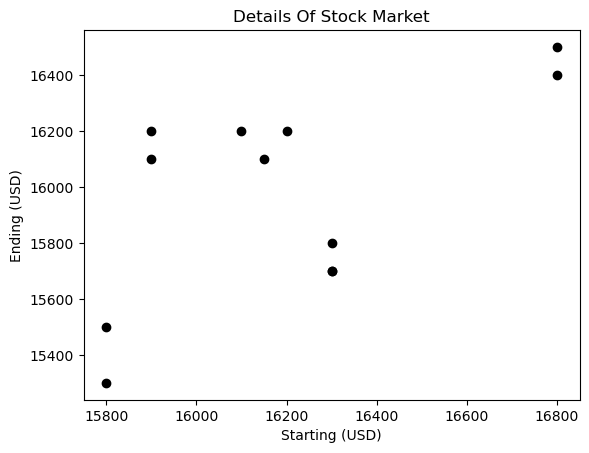

In [11]:
plt.scatter(a,b,color="black")
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")
plt.title("Details Of Stock Market")

In [19]:
x=new_df.drop(columns=['Ending (USD)'],axis=1)
x.head(2)

,Starting (USD)
0,16800
1,15900


In [21]:
y=new_df[['Ending (USD)']]
y.head(3)

,Ending (USD)
0,16500
1,16100
2,15300


Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [40]:
reg=LinearRegression()

In [41]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [12]:
y.mean()

15975.0

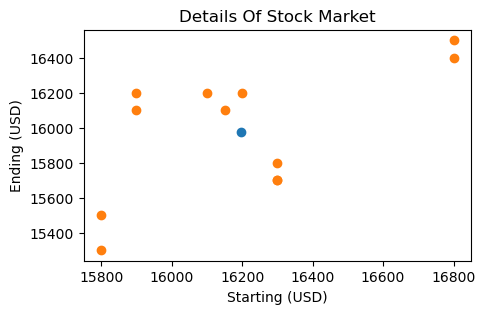

In [81]:
plt.figure(figsize=(5,3))
plt.scatter(x.mean(),y.mean())
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title("Details Of Stock Market")
plt.show()

In [37]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [43]:
reg.fit(x,y)

LinearRegression()

In [45]:
m=reg.coef_
m

array([[0.65258293]])

In [46]:
c=reg.intercept_
c

array([5405.87555702])

In [47]:
m*16700 + c


array([[16304.0105628]])

In [48]:
reg.predict([[16700]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [50]:
new_df['Predicted_y']=reg.predict(x)
new_df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


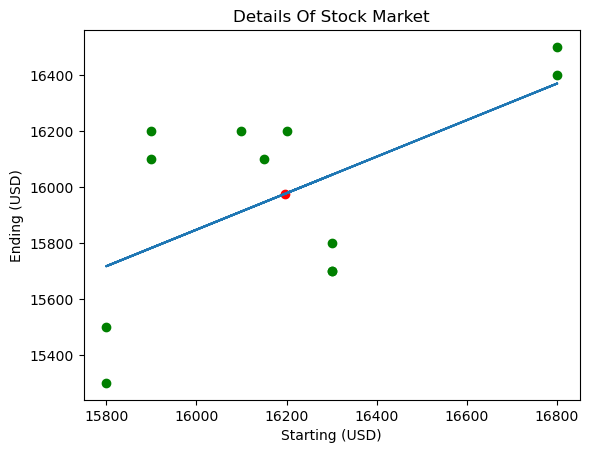

In [54]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.plot(x,reg.predict(x))
plt.scatter(df['Starting (USD)'],df['Ending (USD)'],color='green')
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title("Details Of Stock Market")
plt.show()

In [55]:
reg.predict([[16600]])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16238.75226935]])

In [56]:
new_df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


In [62]:
new_df['loss'] = new_df['Ending (USD)'] - new_df['Predicted_y']


In [63]:
new_df.head()

,Starting (USD),Ending (USD),Predicted_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [66]:
mse = mean_squared_error(df['Ending (USD)'], df['Predicted_y'])
mse

80411.23397700385

In [67]:
mae = mean_absolute_error(df['Ending (USD)'], df['Predicted_y'])
mae

260.3840017604666

In [68]:
sum(abs(df['loss'])) / len(x)


260.3840017604666

In [69]:
reg.score(x,y)


0.3577804940272571

In [82]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571

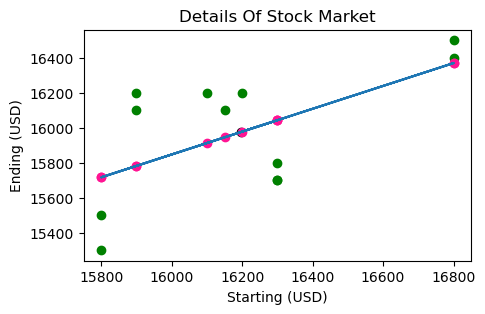

In [78]:
plt.figure(figsize=(5,3))
plt.scatter(x.mean(),y.mean(),color='black')
plt.plot(x,reg.predict(x))
plt.scatter(df['Starting (USD)'],df['Ending (USD)'],color='green')
plt.scatter(df['Starting (USD)'],reg.predict(x),color='deeppink')
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title("Details Of Stock Market")
plt.savefig("LR3.jpg")
plt.show()